In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf

import numpy as np
import os
import io
from medpy.io import load

In [5]:
data = tfds.load('Brats2015')
ds_iter = iter(data['train'])
ds_iter

In [6]:
sample = next(ds_iter)
sample

{'image': <tf.Tensor: shape=(240, 240), dtype=int16, numpy=
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int16)>,
 'mask': <tf.Tensor: shape=(240, 240), dtype=int16, numpy=
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int16)>,
 'modality': <tf.Tensor: shape=(), dtype=string, numpy=b'T2'>,
 'type': <tf.Tensor: shape=(), dtype=string, numpy=b'HGG'>}

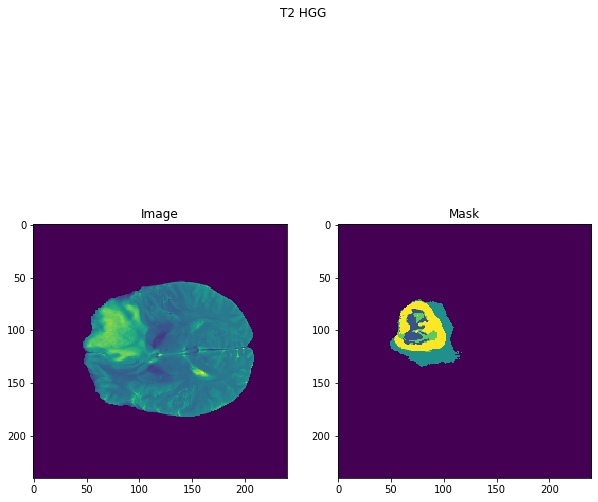

In [7]:
import matplotlib.pyplot as plt
image = sample['image']
mask = sample['mask']
fig, axes = plt.subplots(1,2, figsize=(10,10))
axes[0].imshow(tf.squeeze(image))
axes[0].set_title('Image')
axes[1].imshow(tf.squeeze(mask))
axes[1].set_title('Mask')
plt.suptitle(sample['modality'].numpy().decode("utf-8") +' '+ sample['type'].numpy().decode("utf-8") )
plt.show()

In [ ]:
import tensorflow_datasets.public_api as tfds

# TODO(brats_2015): BibTeX citation
_CITATION = """
"""

# TODO(brats_2015):
_DESCRIPTION = """
"""


class Brats2015(tfds.core.GeneratorBasedBuilder):
  """TODO(brats_2015): Short description of my dataset."""

  # TODO(brats_2015): Set up version.
  VERSION = tfds.core.Version('0.1.0')

  def _info(self):
    # TODO(brats_2015): Specifies the tfds.core.DatasetInfo object
    return tfds.core.DatasetInfo(
        builder=self,
        # This is the description that will appear on the datasets page.
        description=_DESCRIPTION,
        # tfds.features.FeatureConnectors
        features=tfds.features.FeaturesDict({
        ## Tumor Type
        'type' : tfds.features.Text(),
        ## Modality
        'modality': tfds.features.Text(),
        #The MRI image
        'image' : tfds.features.Tensor(shape=(240,240),dtype=tf.int16),
        ## The mask
        'mask' : tfds.features.Tensor(shape=(240,240),dtype = tf.int8),
        
        }),
        # If there's a common (input, target) tuple from the features,
        # specify them here. They'll be used if as_supervised=True in
        # builder.as_dataset.
        supervised_keys=('image','mask'),
        # Homepage of the dataset for documentation
        homepage='https://dataset-homepage/',
        citation=_CITATION,
    )

  def _split_generators(self, dl_manager):
    """Returns SplitGenerators."""
    # TODO(brats_2015): Downloads the data and defines the splits
    # dl_manager is a tfds.download.DownloadManager that can be used to
    # download and extract URLs
    if not tf.io.gfile.exists(dl_manager.manual_dir):
        msg = "You must download the dataset files manually and place them in: "
        msg += dl_manager.manual_dir
        raise AssertionError(msg)
        
    # There is no predefined train/val/test split for this dataset
    return [
        tfds.core.SplitGenerator(
            name=tfds.Split.TRAIN,
            gen_kwargs={
                "filepath": dl_manager.manual_dir
            },
        ),
    ]
  def _generate_examples(self,filepath=None):
    """Yields examples."""
    # TODO(brats_2015): Yields (key, example) tuples from the dataset
    yield 'key', {}



In [ ]:
test = Brats2015()
test._split_generators()

In [4]:
filepath ='/Users/Jingjing/tensorflow_datasets/downloads/manual'

In [5]:
brats = filepath +'/BRATS2015_Training'
brats

'/Users/Jingjing/tensorflow_datasets/downloads/manual/BRATS2015_Training'

In [ ]:
for tumor_type in tf.io.gfile.listdir(brats):
    if tumor_type.startswith('.'):
        pass
    else:
        tumor_type_path = os.path.join(brats,tumor_type)
        for pat in tf.io.gfile.listdir(tumor_type_path):
            if pat.startswith('.'):
                pass
            else:
                pat_path = os.path.join(tumor_type_path,pat)
                image_files = []
                for file in tf.io.gfile.listdir(pat_path):

                    if 'OT.' in file:
                        for image in tf.io.gfile.listdir(os.path.join(pat_path,file)):
                            if image.endswith('.mha'):
                                mask_file = os.path.join(pat_path,file,image)
                                break

                    else:
                        for image in tf.io.gfile.listdir(os.path.join(pat_path,file)):
                            if image.endswith('.mha'):
                                image_files.append(os.path.join(pat_path,file,image))
                mask_array,mask_header = load(mask_file)
                total_slices = mask_array.shape[2]
                for image in image_files:
                    modality = image.split('/')[-1].split('.')[-3].split('_')[-1]
                    image_array, image_header = load(image)
                    for current_slice in range(0,total_slices):
                        key = image.split('/')[-1].split('.')[-2]+'_'+modality+'_'+str(current_slice+1)
                        yield( key,
                                        {
                                                
                                                'type' : tumor_type,
                                                'modality': modality,
                                                'image':image_array[:,:,current_slice],
                                                'mask' : mask_array[:,:,current_slice],

                                        })

In [ ]:
mask_array,mask_header = load(mask_file)
total_slices = mask_array.shape[2]
for image in image_files:
                modality = image.split('/')[-1].split('.')[-3].split('_')[-1]
                image_array, image_header = load(image)
                for current_slice in range(0,total_slices):
                    print(image.split('/')[-1].split('.')[-2]+'_'+modality+'_'+str(current_slice+1))
                    print('image',image_array[:,:,current_slice].shape)
                    print('mask',mask_array[:,:,current_slice].shape)
                    print(modality)

        

In [6]:
for tumor_type in tf.io.gfile.listdir(brats):
    if tumor_type.startswith('.'):
        pass
    else:
        tumor_type_path = os.path.join(brats,tumor_type)
        for pat in tf.io.gfile.listdir(tumor_type_path):
            if pat.startswith('.'):
                pass
            else:
                pat_path = os.path.join(tumor_type_path,pat)
                image_files = []
                for file in tf.io.gfile.listdir(pat_path):
                    if file.startswith('.'):
                        pass
                    else:
                        if 'OT.' in file:
                            for image in tf.io.gfile.listdir(os.path.join(pat_path,file)):
                                if image.endswith('.mha'):
                                    mask_file = os.path.join(pat_path,file,image)
                                    break

                        else:
                            for image in tf.io.gfile.listdir(os.path.join(pat_path,file)):
                                if image.endswith('.mha'):
                                    image_files.append(os.path.join(pat_path,file,image))

In [5]:
mask_file='/Users/Jingjing/tensorflow_datasets/downloads/manual/BRATS2015_Training/LGG/brats_tcia_pat261_0001/VSD.Brain_3more.XX.O.OT.42485/VSD.Brain_3more.XX.O.OT.42485.mha'

In [7]:
mask_array,mask_header = load(mask_file)
mask_array  = mask_array.astype('int16')
mask_array.dtype

dtype('int16')